In [1]:
import os
os.chdir("C:\\Users\\ASUS\\OneDrive\\Desktop\\PGDA\\Imarticus\\Vinod Sir\\Working Directory")
import pandas as pd
import numpy as np
import statsmodels.api as smf
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\PGDA\\Projects\\Wine Quality\\winequality-red.csv")

In [3]:
df.shape

(1599, 12)

In [5]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

_________________________________________________________________________________________________________________________

# EDA

In [9]:
cols = df.columns

In [10]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [11]:
for i in cols:
    print(i)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


# --------------------------------------------------------------------------------------------------------

# Target Variable : 

# --------------------------------------------------------------------------------------------------------

## quality ------------- Categorical

In [12]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0.5, 1.0, 'Barplot of : Quality')

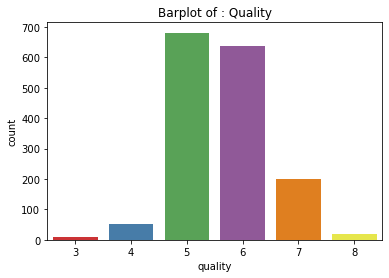

In [13]:
# Bar Plot
sns.countplot(x = 'quality', data = df, palette = 'Set1')
plt.title('Barplot of : Quality')

#### However the Problem statement is to find the Good and Bad Quality of Wine

#### Hence Converting into just 2 categories 
5 and below as One Category, 
Above 5 as Another Category

In [14]:
df['quality'] = df['quality'].replace([3,4,5],0)
df['quality'] = df['quality'].replace([6,7,8],1)

In [15]:
df['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

# --------------------------------------------------------------------------------------------------------

# Predictors :

# --------------------------------------------------------------------------------------------------------

## fixed acidity ---- continuous

In [16]:
df['fixed acidity'].value_counts()

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64

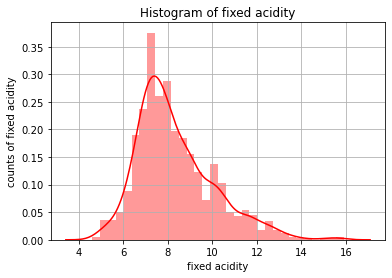

In [17]:
#______histogram
sns.distplot(df['fixed acidity'], bins = 'auto', color = 'red')
plt.xlabel('fixed acidity')
plt.ylabel('counts of fixed acidity')
plt.title('Histogram of fixed acidity') 
plt.grid()

<AxesSubplot:>

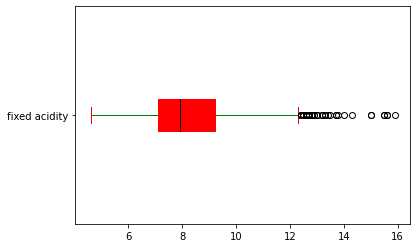

In [18]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['fixed acidity'].plot.box(color=props2, patch_artist = True, vert = False)

In [19]:
q1 = df['fixed acidity'].quantile(0.25)
q3 = df['fixed acidity'].quantile(0.75)
iqr = q3-q1
upper_limit = q3+(1.5*iqr)
lower_limit = q1-(1.5*iqr)
print("lower limit:",lower_limit)
print("upper limit:",upper_limit)

lower limit: 3.95
upper limit: 12.349999999999998


In [20]:
df['fixed acidity'] = np.where(df['fixed acidity']>upper_limit, upper_limit, df['fixed acidity'])
df['fixed acidity'] = np.where(df['fixed acidity']<lower_limit, lower_limit, df['fixed acidity'])

<AxesSubplot:>

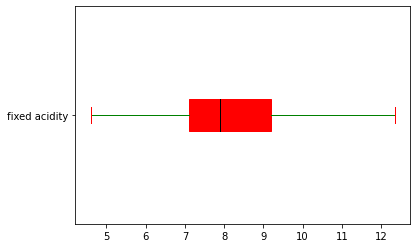

In [21]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['fixed acidity'].plot.box(color=props2, patch_artist = True, vert = False)

# --------------------------------------------------------------------------------------------------------

## volatile acidity ----------------- Conti

In [22]:
df["volatile acidity"].value_counts()

0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64

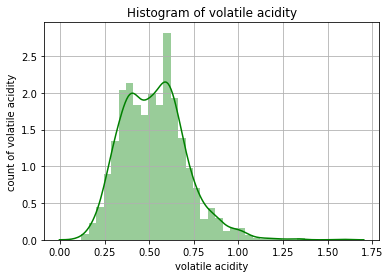

In [23]:
# Histogram
sns.distplot(df["volatile acidity"], bins="auto",color='green')
plt.xlabel("volatile acidity")
plt.ylabel("count of volatile acidity")
plt.title("Histogram of volatile acidity")
plt.grid()

<AxesSubplot:>

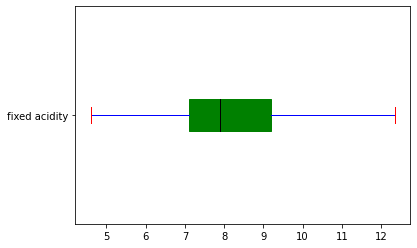

In [24]:
# Boxplot
props2 = dict(boxes = 'green', whiskers = 'blue', medians = 'black', caps = 'red')
df['fixed acidity'].plot.box(color=props2, patch_artist = True, vert = False) # no outliers

# --------------------------------------------------------------------------------------------------------

## citric acid

In [25]:
df["citric acid"].value_counts()

0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64

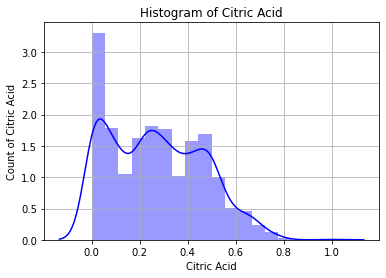

In [26]:
# Histogram
sns.distplot(df['citric acid'], bins='auto', color = "blue")
plt.xlabel("Citric Acid")
plt.ylabel("Count of Citric Acid")
plt.title("Histogram of Citric Acid")
plt.grid()

<AxesSubplot:>

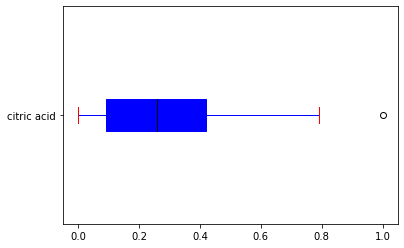

In [27]:
# Boxplot
props2 = dict(boxes = 'blue', whiskers = 'blue', medians = 'black', caps = 'red')
df['citric acid'].plot.box(color=props2, patch_artist = True, vert = False)

In [28]:
# Outliers
q1 = df['citric acid'].quantile(0.25)
q3 = df['citric acid'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [29]:
df['citric acid'] = np.where(df['citric acid']>ul,ul,df['citric acid'])
df['citric acid'] = np.where(df['citric acid']<ll,ll,df['citric acid'])

<AxesSubplot:>

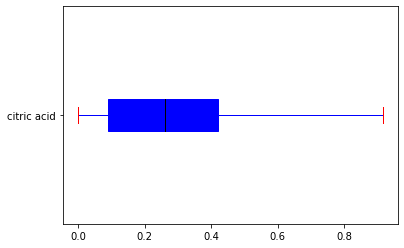

In [30]:
# Boxplot post fixing the Outliers
props2 = dict(boxes = 'blue', whiskers = 'blue', medians = 'black', caps = 'red')
df['citric acid'].plot.box(color=props2, patch_artist = True, vert = False)

# --------------------------------------------------------------------------------------------------------

## residual sugar

In [31]:
df['residual sugar'].value_counts()

2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64

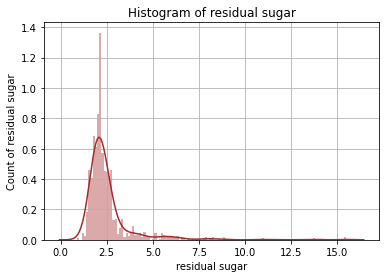

In [32]:
# Histogram
sns.distplot(df['residual sugar'], bins='auto', color = "brown")
plt.xlabel("residual sugar")
plt.ylabel("Count of residual sugar")
plt.title("Histogram of residual sugar")
plt.grid()

<AxesSubplot:>

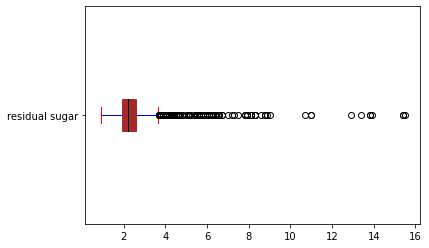

In [33]:
# Boxplot
props2 = dict(boxes = 'brown', whiskers = 'blue', medians = 'black', caps = 'red')
df['residual sugar'].plot.box(color=props2, patch_artist = True, vert = False)

In [34]:
# Outliers
q1 = df['residual sugar'].quantile(0.25)
q3 = df['residual sugar'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [35]:
ul_data=df.loc[df['residual sugar']>ul]
ul_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,0
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,0
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,0
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,0
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1552,6.3,0.680,0.01,3.7,0.103,32.0,54.0,0.99586,3.51,0.66,11.3,1
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,0
1574,5.6,0.310,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,1
1577,6.2,0.700,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.9,1


In [36]:
ll_data=df.loc[df['residual sugar']<ll]
ll_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [37]:
df['residual sugar'] = np.where(df['residual sugar']>ul,ul,df['residual sugar'])
df['residual sugar'] = np.where(df['residual sugar']<ll,ll,df['residual sugar'])

<AxesSubplot:>

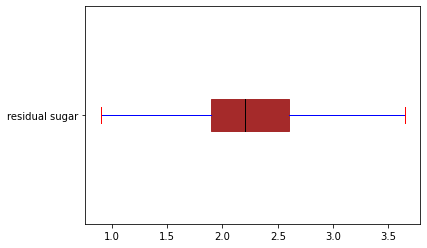

In [38]:
# Boxplot post fixing the Outliers
props2 = dict(boxes = 'brown', whiskers = 'blue', medians = 'black', caps = 'red')
df['residual sugar'].plot.box(color=props2, patch_artist = True, vert = False)

# --------------------------------------------------------------------------------------------------------

## chlorides

In [39]:
df['chlorides'].value_counts()

0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64

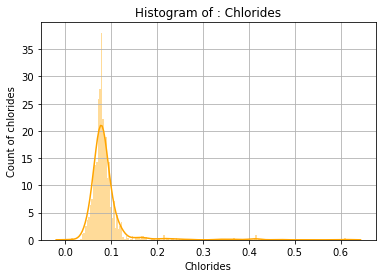

In [40]:
# Histogram
sns.distplot(df['chlorides'],color='orange', bins = 'auto')
plt.xlabel("Chlorides")
plt.ylabel("Count of chlorides")
plt.title("Histogram of : Chlorides")
plt.grid()

<AxesSubplot:>

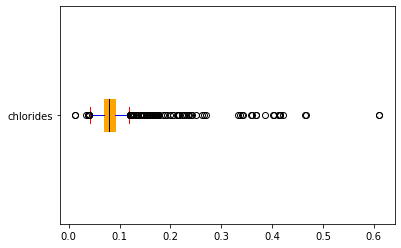

In [41]:
# Boxplot
props2 = dict(boxes = 'orange', whiskers = 'blue', medians = 'black', caps = 'red')
df['chlorides'].plot.box(color=props2, patch_artist = True, vert = False)

In [42]:
# Outliers
q1 = df['chlorides'].quantile(0.25)
q3 = df['chlorides'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [43]:
ul_data=df.loc[df['chlorides']>ul]
ul_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.62,0.18,3.65,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,0
15,8.9,0.62,0.19,3.65,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,0
17,8.1,0.56,0.28,1.70,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,0
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,1
38,5.7,1.13,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1436,10.0,0.38,0.38,1.60,0.169,27.0,90.0,0.99914,3.15,0.65,8.5,0
1474,9.9,0.50,0.50,3.65,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,0
1476,9.9,0.50,0.50,3.65,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,0
1558,6.9,0.63,0.33,3.65,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,0


In [44]:
ll_data=df.loc[df['chlorides']<ll]
ll_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
210,9.7,0.53,0.60,2.0,0.039,5.0,19.0,0.99585,3.30,0.86,12.4,1
688,7.7,0.66,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4,0
695,5.1,0.47,0.02,1.3,0.034,18.0,44.0,0.99210,3.90,0.62,12.8,1
797,9.3,0.37,0.44,1.6,0.038,21.0,42.0,0.99526,3.24,0.81,10.8,1
836,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,1
837,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,1
861,5.8,1.01,0.66,2.0,0.039,15.0,88.0,0.99357,3.66,0.60,11.5,1
1490,7.1,0.22,0.49,1.8,0.039,8.0,18.0,0.99344,3.39,0.56,12.4,1
1571,6.4,0.38,0.14,2.2,0.038,15.0,25.0,0.99514,3.44,0.65,11.1,1


In [45]:
df['chlorides'] = np.where(df['chlorides']>ul, ul, df['chlorides'])
df['chlorides'] = np.where(df['chlorides']<ll, ll, df['chlorides'])

<AxesSubplot:>

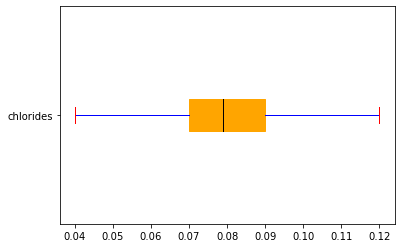

In [46]:
# Boxplot
props2 = dict(boxes = 'orange', whiskers = 'blue', medians = 'black', caps = 'red')
df['chlorides'].plot.box(color=props2, patch_artist = True, vert = False)

# --------------------------------------------------------------------------------------------------------

## free sulfur dioxide

In [47]:
df['free sulfur dioxide'].value_counts()

6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.0     59
13.0     57
8.0      56
14.0     50
3.0      49
18.0     46
4.0      41
21.0     41
19.0     39
24.0     34
26.0     32
23.0     32
20.0     30
27.0     29
25.0     24
29.0     23
28.0     23
22.0     22
32.0     22
31.0     20
34.0     18
30.0     16
35.0     15
36.0     11
33.0     11
38.0      9
41.0      7
40.0      6
39.0      5
48.0      4
51.0      4
45.0      3
1.0       3
43.0      3
42.0      3
52.0      3
37.0      3
68.0      2
55.0      2
50.0      2
37.5      2
53.0      1
72.0      1
57.0      1
47.0      1
5.5       1
2.0       1
46.0      1
54.0      1
40.5      1
66.0      1
Name: free sulfur dioxide, dtype: int64

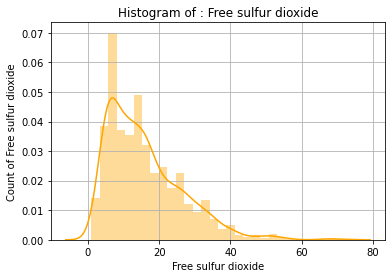

In [48]:
# Histogram
sns.distplot(df['free sulfur dioxide'],color='orange', bins = 'auto')
plt.xlabel("Free sulfur dioxide")
plt.ylabel("Count of Free sulfur dioxide")
plt.title("Histogram of : Free sulfur dioxide")
plt.grid()

<AxesSubplot:>

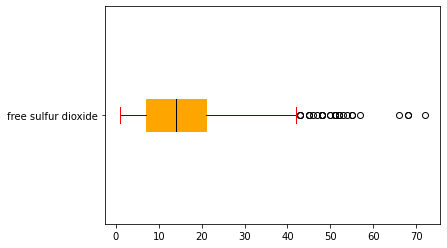

In [49]:
# Boxplot
props2 = dict(boxes = 'orange', whiskers = 'blue', medians = 'black', caps = 'red')
df['free sulfur dioxide'].plot.box(color=props2, patch_artist = True, vert = False)

In [50]:
# Outliers
q1 = df['free sulfur dioxide'].quantile(0.25)
q3 = df['free sulfur dioxide'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [51]:
ul_data=df.loc[df['free sulfur dioxide']>ul]
ul_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.65,0.120,52.0,145.0,0.99860,3.16,0.88,9.2,0
15,8.9,0.620,0.19,3.65,0.120,51.0,148.0,0.99860,3.17,0.93,9.2,0
57,7.5,0.630,0.12,3.65,0.111,50.0,110.0,0.99830,3.26,0.77,9.4,0
396,6.6,0.735,0.02,3.65,0.120,68.0,124.0,0.99940,3.47,0.53,9.9,0
400,6.6,0.735,0.02,3.65,0.120,68.0,124.0,0.99940,3.47,0.53,9.9,0
497,7.2,0.340,0.32,2.50,0.090,43.0,113.0,0.99660,3.32,0.79,11.1,0
522,8.2,0.390,0.49,2.30,0.099,47.0,133.0,0.99790,3.38,0.99,9.8,0
584,11.8,0.330,0.49,3.40,0.093,54.0,80.0,1.00020,3.30,0.76,10.7,1
634,7.9,0.350,0.21,1.90,0.073,46.0,102.0,0.99640,3.27,0.58,9.5,0
678,8.3,0.780,0.10,2.60,0.081,45.0,87.0,0.99830,3.48,0.53,10.0,0


In [52]:
ll_data=df.loc[df['free sulfur dioxide']<ll]
ll_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [53]:
df['free sulfur dioxide'] = np.where(df['free sulfur dioxide']>ul, ul, df['free sulfur dioxide'])
df['free sulfur dioxide'] = np.where(df['free sulfur dioxide']<ll, ll, df['free sulfur dioxide'])

<AxesSubplot:>

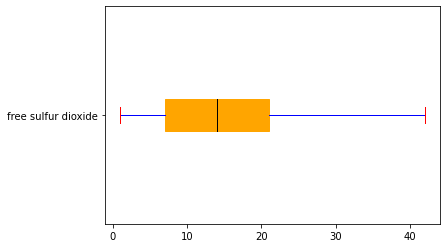

In [54]:
# Boxplot
props2 = dict(boxes = 'orange', whiskers = 'blue', medians = 'black', caps = 'red')
df['free sulfur dioxide'].plot.box(color=props2, patch_artist = True, vert = False)

# --------------------------------------------------------------------------------------------------------

## total sulfur dioxide

In [55]:
df['total sulfur dioxide'].value_counts()

28.0     43
24.0     36
15.0     35
18.0     35
23.0     34
         ..
139.0     1
149.0     1
152.0     1
155.0     1
165.0     1
Name: total sulfur dioxide, Length: 144, dtype: int64

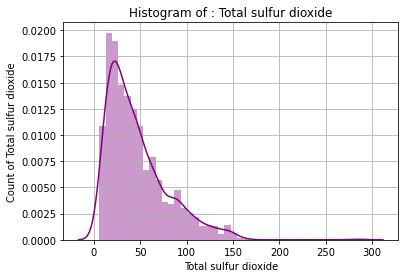

In [56]:
# Histogram
sns.distplot(df['total sulfur dioxide'],color='purple', bins = 'auto')
plt.xlabel("Total sulfur dioxide")
plt.ylabel("Count of Total sulfur dioxide")
plt.title("Histogram of : Total sulfur dioxide")
plt.grid()

<AxesSubplot:>

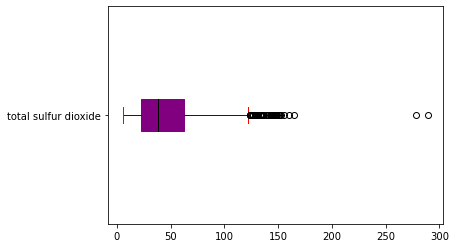

In [57]:
# Boxplot
props2 = dict(boxes = 'purple', whiskers = 'blue', medians = 'black', caps = 'red')
df['total sulfur dioxide'].plot.box(color=props2, patch_artist = True, vert = False)

In [58]:
# Outliers
q1 = df['total sulfur dioxide'].quantile(0.25)
q3 = df['total sulfur dioxide'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [59]:
ul_data=df.loc[df['total sulfur dioxide']>ul]
ul_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.65,0.120,42.0,145.0,0.99860,3.16,0.88,9.2,0
15,8.9,0.620,0.19,3.65,0.120,42.0,148.0,0.99860,3.17,0.93,9.2,0
86,8.6,0.490,0.28,1.90,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,1
88,9.3,0.390,0.44,2.10,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,0
90,7.9,0.520,0.26,1.90,0.079,42.0,140.0,0.99640,3.23,0.54,9.5,0
91,8.6,0.490,0.28,1.90,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,1
92,8.6,0.490,0.29,2.00,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,0
109,8.1,0.785,0.52,2.00,0.120,37.0,153.0,0.99690,3.21,0.69,9.3,0
130,8.0,0.745,0.56,2.00,0.118,30.0,134.0,0.99680,3.24,0.66,9.4,0
145,8.1,0.670,0.55,1.80,0.117,32.0,141.0,0.99680,3.17,0.62,9.4,0


In [60]:
ll_data=df.loc[df['total sulfur dioxide']<ll]
ll_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [61]:
df['total sulfur dioxide'] = np.where(df['total sulfur dioxide']>ul, ul, df['total sulfur dioxide'])
df['total sulfur dioxide'] = np.where(df['total sulfur dioxide']<ll, ll, df['total sulfur dioxide'])

<AxesSubplot:>

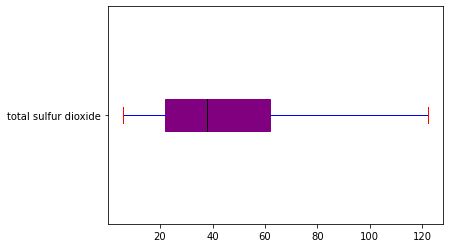

In [62]:
# Boxplot
props2 = dict(boxes = 'purple', whiskers = 'blue', medians = 'black', caps = 'red')
df['total sulfur dioxide'].plot.box(color=props2, patch_artist = True, vert = False)

# --------------------------------------------------------------------------------------------------------

## density

In [63]:
df['density'].value_counts()

0.99720    36
0.99680    35
0.99760    35
0.99800    29
0.99620    28
           ..
0.99684     1
0.99764     1
0.99473     1
0.99320     1
0.99651     1
Name: density, Length: 436, dtype: int64

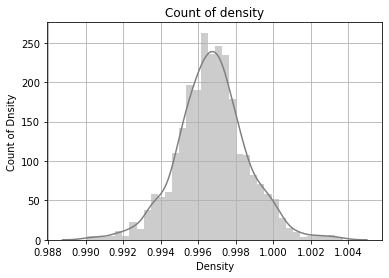

In [64]:
# Histogram
sns.distplot(df['density'],bins='auto',color='grey')
plt.xlabel("Density")
plt.ylabel("Count of Dnsity")
plt.title("Count of density")
plt.grid()

<AxesSubplot:>

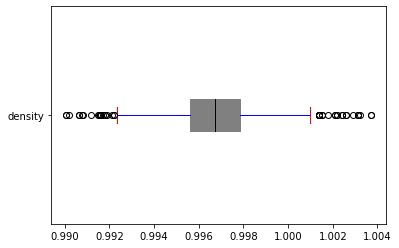

In [65]:
# Boxplot
props2 = dict(boxes = 'grey', whiskers = 'blue', medians = 'black', caps = 'red')
df['density'].plot.box(color=props2, patch_artist = True, vert = False)

In [66]:
# Outliers
q1 = df['density'].quantile(0.25)
q3 = df['density'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [67]:
ul_data=df.loc[df['density']>ul]
ul_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
294,12.35,0.340,0.52,3.20,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,1
324,10.00,0.490,0.20,3.65,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,1
325,10.00,0.490,0.20,3.65,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,1
353,12.35,0.530,0.79,3.65,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,0
364,12.35,0.615,0.66,3.65,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,1
366,12.35,0.615,0.66,3.65,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,1
374,12.35,0.410,0.63,3.65,0.089,6.0,47.0,1.00140,3.01,0.81,10.8,1
381,12.35,0.415,0.68,2.90,0.085,17.0,43.0,1.00140,3.06,0.80,10.0,1
391,12.35,0.415,0.68,2.90,0.085,17.0,43.0,1.00140,3.06,0.80,10.0,1
415,8.60,0.725,0.24,3.65,0.117,31.0,122.0,1.00140,3.32,1.07,9.3,0


In [68]:
ll_data=df.loc[df['density']<ll]
ll_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.2,0.34,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,1
144,5.2,0.34,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,1
354,6.1,0.21,0.40,1.40,0.066,40.5,122.0,0.99120,3.25,0.59,11.900000,1
588,5.0,0.42,0.24,2.00,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,1
591,6.6,0.39,0.49,1.70,0.070,23.0,122.0,0.99220,3.12,0.50,11.500000,1
695,5.1,0.47,0.02,1.30,0.040,18.0,44.0,0.99210,3.90,0.62,12.800000,1
821,4.9,0.42,0.00,2.10,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,1
836,6.7,0.28,0.28,2.40,0.040,36.0,100.0,0.99064,3.26,0.39,11.700000,1
837,6.7,0.28,0.28,2.40,0.040,36.0,100.0,0.99064,3.26,0.39,11.700000,1
999,6.4,0.69,0.00,1.65,0.055,7.0,12.0,0.99162,3.47,0.53,12.900000,1


In [69]:
df['density'] = np.where(df['density']>ul, ul, df['density'])
df['density'] = np.where(df['density']<ll, ll, df['density'])

<AxesSubplot:>

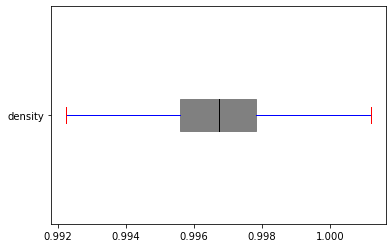

In [70]:
# Boxplot post fixing the outliers
props2 = dict(boxes = 'grey', whiskers = 'blue', medians = 'black', caps = 'red')
df['density'].plot.box(color=props2, patch_artist = True, vert = False)

# --------------------------------------------------------------------------------------------------------

## pH

In [71]:
df['pH'].value_counts()

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: pH, Length: 89, dtype: int64

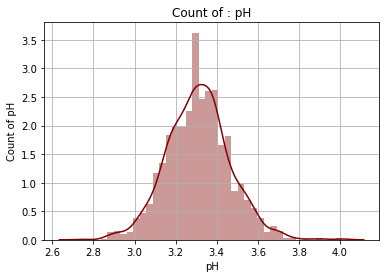

In [72]:
# Histogram
sns.distplot(df['pH'],bins='auto',color='maroon')
plt.xlabel("pH")
plt.ylabel("Count of pH")
plt.title("Count of : pH")
plt.grid()

<AxesSubplot:>

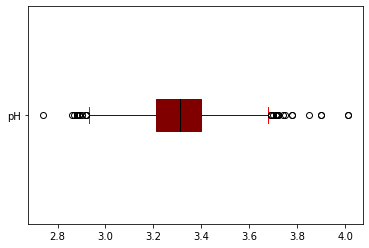

In [73]:
# Boxplot
props2 = dict(boxes = 'maroon', whiskers = 'blue', medians = 'black', caps = 'red')
df['pH'].plot.box(color=props2, patch_artist = True, vert = False)

In [74]:
# Outliers
q1 = df['pH'].quantile(0.25)
q3 = df['pH'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [75]:
ul_data=df.loc[df['pH']>ul]
ul_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,4.6,0.520,0.15,2.10,0.054,8.0,65.0,0.993400,3.90,0.56,13.1,0
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.993800,3.75,0.48,10.5,0
95,4.7,0.600,0.17,2.30,0.058,17.0,106.0,0.993200,3.85,0.60,12.9,1
268,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.998700,3.69,0.91,9.4,1
276,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.998700,3.69,0.91,9.4,1
553,5.0,1.040,0.24,1.60,0.050,32.0,96.0,0.993400,3.74,0.62,11.5,0
588,5.0,0.420,0.24,2.00,0.060,19.0,50.0,0.992248,3.72,0.74,14.0,1
695,5.1,0.470,0.02,1.30,0.040,18.0,44.0,0.992248,3.90,0.62,12.8,1
821,4.9,0.420,0.00,2.10,0.048,16.0,42.0,0.992248,3.71,0.74,14.0,1
930,6.6,0.610,0.01,1.90,0.080,8.0,25.0,0.997460,3.69,0.73,10.5,0


In [76]:
ll_data=df.loc[df['pH']<ll]
ll_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.20,0.520,0.915,3.40,0.120,32.0,69.0,0.999600,2.74,2.00,9.4,0
440,12.35,0.310,0.720,2.20,0.072,6.0,29.0,0.998700,2.88,0.82,9.8,1
544,12.35,0.310,0.740,1.80,0.075,6.0,15.0,1.000800,2.86,0.79,8.4,1
554,12.35,0.645,0.490,3.65,0.095,10.0,23.0,1.001187,2.92,0.74,11.1,0
555,12.35,0.645,0.490,3.65,0.095,10.0,23.0,1.001187,2.92,0.74,11.1,0
557,12.35,0.645,0.490,3.65,0.095,10.0,23.0,1.001187,2.92,0.74,11.1,0
614,9.20,0.755,0.180,2.20,0.120,10.0,103.0,0.996900,2.87,1.36,10.2,1
650,10.70,0.430,0.390,2.20,0.106,8.0,32.0,0.998600,2.89,0.50,9.6,0
656,10.70,0.430,0.390,2.20,0.106,8.0,32.0,0.998600,2.89,0.50,9.6,0
657,12.00,0.500,0.590,1.40,0.073,23.0,42.0,0.998000,2.92,0.68,10.5,1


In [77]:
df['pH'] = np.where(df['pH']>ul, ul, df['pH'])
df['pH'] = np.where(df['pH']<ll, ll, df['pH'])

<AxesSubplot:>

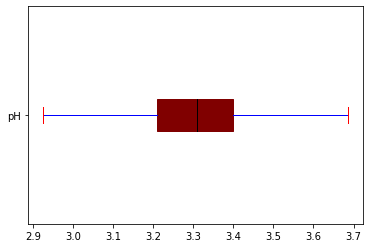

In [78]:
# Boxplot
props2 = dict(boxes = 'maroon', whiskers = 'blue', medians = 'black', caps = 'red')
df['pH'].plot.box(color=props2, patch_artist = True, vert = False)

# --------------------------------------------------------------------------------------------------------

## sulphates

In [79]:
df['sulphates'].value_counts()

0.60    69
0.58    68
0.54    68
0.62    61
0.56    60
        ..
1.00     1
1.59     1
0.33     1
1.26     1
1.01     1
Name: sulphates, Length: 96, dtype: int64

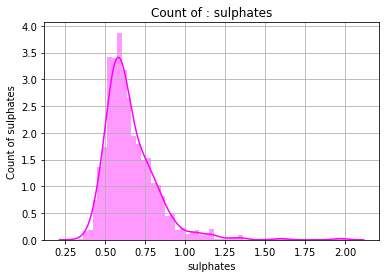

In [80]:
# Histogram
sns.distplot(df['sulphates'],bins='auto',color='magenta')
plt.xlabel("sulphates")
plt.ylabel("Count of sulphates")
plt.title("Count of : sulphates")
plt.grid()

<AxesSubplot:>

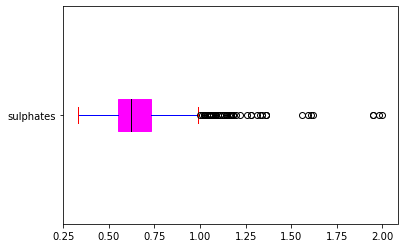

In [81]:
# Boxplot
props2 = dict(boxes = 'magenta', whiskers = 'blue', medians = 'black', caps = 'red')
df['sulphates'].plot.box(color=props2, patch_artist = True, vert = False)

In [82]:
# Outliers
q1 = df['sulphates'].quantile(0.25)
q3 = df['sulphates'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [83]:
ul_data=df.loc[df['sulphates']>ul]
ul_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,7.80,0.610,0.290,1.60,0.114,9.0,29.0,0.997400,3.260,1.56,9.1,0
17,8.10,0.560,0.280,1.70,0.120,16.0,56.0,0.996800,3.110,1.28,9.3,0
19,7.90,0.320,0.510,1.80,0.120,17.0,56.0,0.996900,3.040,1.08,9.2,1
43,8.10,0.660,0.220,2.20,0.069,9.0,23.0,0.996800,3.300,1.20,10.3,0
79,8.30,0.625,0.200,1.50,0.080,27.0,119.0,0.997200,3.160,1.12,9.1,0
81,7.80,0.430,0.700,1.90,0.120,22.0,67.0,0.997400,3.130,1.28,9.4,0
83,7.30,0.670,0.260,1.80,0.120,16.0,51.0,0.996900,3.160,1.14,9.4,0
86,8.60,0.490,0.280,1.90,0.110,20.0,122.0,0.997200,2.930,1.95,9.9,1
88,9.30,0.390,0.440,2.10,0.107,34.0,122.0,0.997800,3.140,1.22,9.5,0
91,8.60,0.490,0.280,1.90,0.110,20.0,122.0,0.997200,2.930,1.95,9.9,1


In [84]:
ll_data=df.loc[df['sulphates']<ll]
ll_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [85]:
df['sulphates'] = np.where(df['sulphates']>ul, ul, df['sulphates'])
df['sulphates'] = np.where(df['sulphates']<ll, ll, df['sulphates'])

<AxesSubplot:>

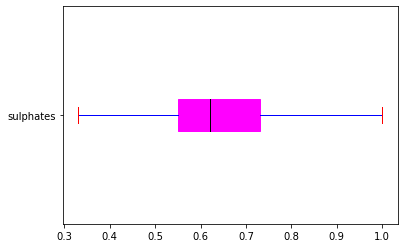

In [86]:
# Boxplot
props2 = dict(boxes = 'magenta', whiskers = 'blue', medians = 'black', caps = 'red')
df['sulphates'].plot.box(color=props2, patch_artist = True, vert = False)

# --------------------------------------------------------------------------------------------------------

## alcohol

In [87]:
df['alcohol'].value_counts()

9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: alcohol, Length: 65, dtype: int64

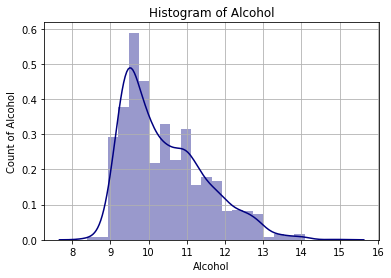

In [88]:
# Histogram
sns.distplot(df['alcohol'], bins = 'auto', color = "navy")
plt.xlabel("Alcohol")
plt.ylabel("Count of Alcohol")
plt.title("Histogram of Alcohol")
plt.grid()

<AxesSubplot:>

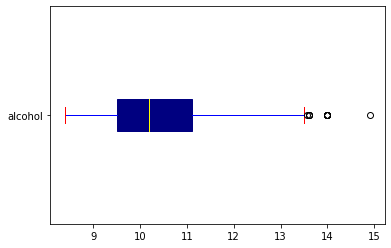

In [89]:
# Boxplot
props2 = dict(boxes = 'navy', whiskers = 'blue', medians = 'yellow', caps = 'red')
df['alcohol'].plot.box(color=props2, patch_artist = True, vert = False)

In [90]:
# Outliers
q1 = df['alcohol'].quantile(0.25)
q3 = df['alcohol'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [91]:
ul_data=df.loc[df['alcohol']>ul]
ul_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.20,0.34,0.00,1.80,0.050,27.0,63.0,0.992248,3.680,0.79,14.000000,1
144,5.20,0.34,0.00,1.80,0.050,27.0,63.0,0.992248,3.680,0.79,14.000000,1
467,8.80,0.46,0.45,2.60,0.065,7.0,18.0,0.994700,3.320,0.79,14.000000,1
588,5.00,0.42,0.24,2.00,0.060,19.0,50.0,0.992248,3.685,0.74,14.000000,1
652,12.35,0.36,0.65,3.65,0.096,22.0,71.0,0.997600,2.980,0.84,14.900000,0
821,4.90,0.42,0.00,2.10,0.048,16.0,42.0,0.992248,3.685,0.74,14.000000,1
1114,5.00,0.40,0.50,3.65,0.046,29.0,80.0,0.992248,3.490,0.66,13.600000,1
1132,7.40,0.36,0.34,1.80,0.075,18.0,38.0,0.993300,3.380,0.88,13.600000,1
1228,5.10,0.42,0.00,1.80,0.044,18.0,88.0,0.992248,3.680,0.73,13.600000,1
1269,5.50,0.49,0.03,1.80,0.044,28.0,87.0,0.992248,3.500,0.82,14.000000,1


In [92]:
ll_data=df.loc[df['alcohol']<ll]
ll_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [93]:
df['alcohol'] = np.where(df['alcohol']>ul, ul, df['alcohol'])
df['alcohol'] = np.where(df['alcohol']<ll, ll, df['alcohol'])

<AxesSubplot:>

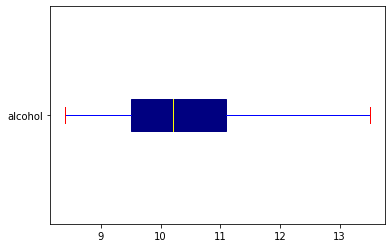

In [94]:
# Boxplot
props2 = dict(boxes = 'navy', whiskers = 'blue', medians = 'yellow', caps = 'red')
df['alcohol'].plot.box(color=props2, patch_artist = True, vert = False)

# --------------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------------

In [95]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.262746,0.678704,0.215090,0.228484,-0.157083,-0.119486,0.668076,-0.689824,0.215195,-0.070242,0.097731
volatile acidity,-0.262746,1.000000,-0.553016,0.035692,0.135006,-0.010326,0.084993,0.013082,0.236802,-0.316949,-0.202027,-0.321441
citric acid,0.678704,-0.553016,1.000000,0.183553,0.147668,-0.060140,0.019277,0.369893,-0.546002,0.333402,0.111640,0.159576
residual sugar,0.215090,0.035692,0.183553,1.000000,0.208471,0.082933,0.157250,0.424354,-0.094584,0.034996,0.107114,-0.001782
chlorides,0.228484,0.135006,0.147668,0.208471,1.000000,-0.012169,0.098054,0.407441,-0.259512,0.107645,-0.295608,-0.162087
free sulfur dioxide,-0.157083,-0.010326,-0.060140,0.082933,-0.012169,1.000000,0.687184,-0.034012,0.075415,0.049086,-0.068099,-0.060590
total sulfur dioxide,-0.119486,0.084993,0.019277,0.157250,0.098054,0.687184,1.000000,0.095871,-0.051863,-0.003229,-0.228860,-0.244661
density,0.668076,0.013082,0.369893,0.424354,0.407441,-0.034012,0.095871,1.000000,-0.336870,0.161310,-0.500237,-0.159895
pH,-0.689824,0.236802,-0.546002,-0.094584,-0.259512,0.075415,-0.051863,-0.336870,1.000000,-0.134702,0.195196,-0.007257
sulphates,0.215195,-0.316949,0.333402,0.034996,0.107645,0.049086,-0.003229,0.161310,-0.134702,1.000000,0.155310,0.284757


<AxesSubplot:>

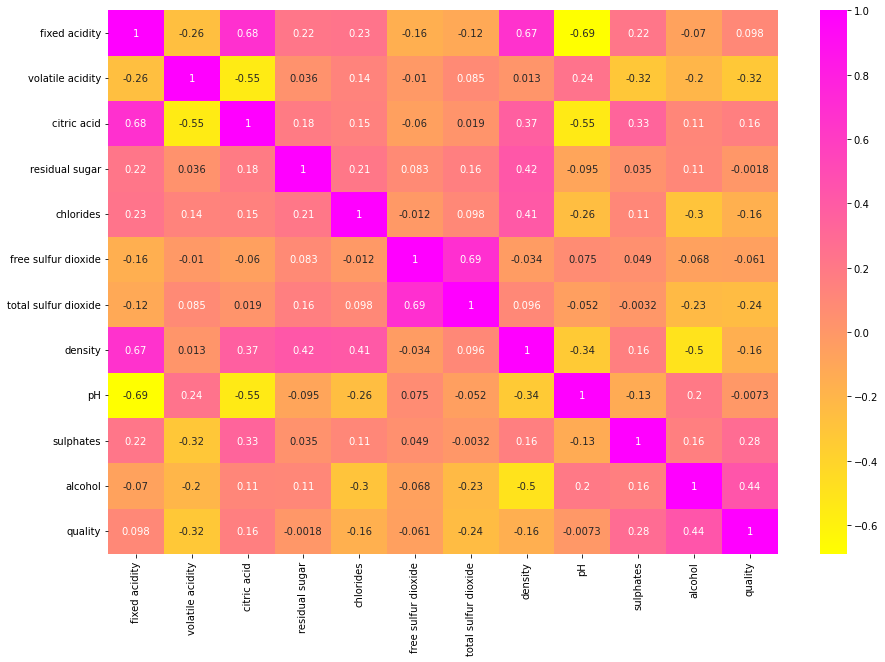

In [96]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True ,cmap='spring_r')

# Checking Multi-Colinearity by Checking VIF

In [97]:
X = df.iloc[0:,:-1]
vif = pd.DataFrame()
vif['features'] = X.columns

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [99]:
vif.head(25)

,features,VIF
0,fixed acidity,80.042031
1,volatile acidity,16.747442
2,citric acid,8.662006
3,residual sugar,18.593564
4,chlorides,28.294620
5,free sulfur dioxide,7.223490
6,total sulfur dioxide,7.561448
7,density,1548.421893
8,pH,1094.646570
9,sulphates,28.484084


In [100]:
droppy = []
for a, b in vif.iterrows():
    if b["VIF"]>20:
        droppy.append(b[0])
        
droppy

['fixed acidity', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']

In [101]:
df.drop(columns = droppy, axis = 1, inplace = True)

In [102]:
df

,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,quality
0,0.700,0.00,1.9,11.0,34.0,0
1,0.880,0.00,2.6,25.0,67.0,0
2,0.760,0.04,2.3,15.0,54.0,0
3,0.280,0.56,1.9,17.0,60.0,1
4,0.700,0.00,1.9,11.0,34.0,0
...,...,...,...,...,...,...
1594,0.600,0.08,2.0,32.0,44.0,0
1595,0.550,0.10,2.2,39.0,51.0,1
1596,0.510,0.13,2.3,29.0,40.0,1
1597,0.645,0.12,2.0,32.0,44.0,0


In [103]:
X = df.iloc[0:,:-1]
vif = pd.DataFrame()
vif['features'] = X.columns

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.head()

,features,VIF
0,volatile acidity,7.730713
1,citric acid,3.415399
2,residual sugar,13.086691
3,free sulfur dioxide,6.433001
4,total sulfur dioxide,6.458150


In [105]:
df

,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,quality
0,0.700,0.00,1.9,11.0,34.0,0
1,0.880,0.00,2.6,25.0,67.0,0
2,0.760,0.04,2.3,15.0,54.0,0
3,0.280,0.56,1.9,17.0,60.0,1
4,0.700,0.00,1.9,11.0,34.0,0
...,...,...,...,...,...,...
1594,0.600,0.08,2.0,32.0,44.0,0
1595,0.550,0.10,2.2,39.0,51.0,1
1596,0.510,0.13,2.3,29.0,40.0,1
1597,0.645,0.12,2.0,32.0,44.0,0


# Smote

In [106]:
high = df[df["quality"] == 1] #15128,26
low = df[df["quality"] == 0] #4514, 26
#__________________________________ oversample minority_with replacement
from sklearn.utils import resample
low_oversample = resample(low,
                          replace=True, # sample with replacement
                          n_samples=len(high), # match number in majority class
                          random_state=27) # reproducible results


In [107]:
# combine majority and oversampled minority

dfsmote = pd.concat([high, low_oversample]) 
dfsmote.quality.value_counts()

1    855
0    855
Name: quality, dtype: int64

# Data into X and Y

# Train and Test

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
# get the locations
X = dfsmote.iloc[:, :-1]
y = dfsmote.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [110]:
X_train.shape

(1624, 5)

In [111]:
y_train.shape

(1624,)

In [112]:
X_test.shape

(86, 5)

In [113]:
y_test.shape

(86,)

# Building the Model

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
lgr = LogisticRegression()

In [116]:
lgr.fit(X_train,y_train)

LogisticRegression()

In [117]:
y_pred = lgr.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0],
      dtype=int64)

# Checking the Model

In [118]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [119]:
model.intercept_
model.coef_

array([[-2.95016332,  0.51444154,  0.2141896 ,  0.04751962, -0.02891904]])

In [120]:
#Predictions
y_pred = model.predict(X_test)

In [121]:
#Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[30 10]
 [11 35]]


In [122]:
#Accuracy Score - correct predictions / total number of data points
model.score(X_test,y_test)

0.7558139534883721

In [123]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74        40
           1       0.78      0.76      0.77        46

    accuracy                           0.76        86
   macro avg       0.75      0.76      0.75        86
weighted avg       0.76      0.76      0.76        86



In [124]:
#ROC Curve - Receiver Operating Characteristic curve
#tpr = True Positive Rate 
#fpr = False Positive Rate
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred_prob = model.predict_proba(X)

In [125]:
df.quality.shape

(1599,)

In [126]:
dfsmote.quality.shape

(1710,)

In [127]:
y_train.shape

(1624,)

In [128]:
fpr, tpr, thresholds = roc_curve(dfsmote.quality, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr) #Area under Curve 0.82
print(roc_auc)

0.7442645600355664


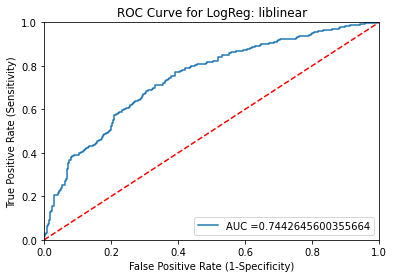

In [129]:
#ROC Curve
plt.title('ROC Curve for LogReg: liblinear')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()